
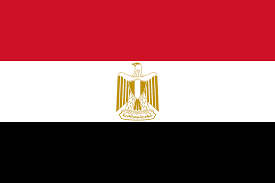

<a id="2"></a>
# <p style="background-color:#627D78;font-family:newtimeroman;color:#D5CABD;font-size:150%;text-align:center;border-radius:20px 60px;">تحميل المكتبات </p>

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
plt.rcParams.update({'font.size': 14})
from math import pi
from matplotlib.patches import Rectangle, Ellipse
import warnings
warnings.filterwarnings("ignore")

<a id="2"></a>
# <p style="background-color:#627D78;font-family:newtimeroman;color:#D5CABD;font-size:150%;text-align:center;border-radius:20px 60px;">تحميل البيانات</p>

In [ ]:
df=pd.read_csv('../input/kaggle-survey-2021/kaggle_survey_2021_responses.csv')
df

<a id="2"></a>
# <p style="background-color:#627D78;font-family:newtimeroman;color:#D5CABD;font-size:150%;text-align:center;border-radius:20px 60px;">الالوان المستخدمه</p>

In [ ]:
responses = df[1:].reset_index(drop=True)

# Color palette
other_color = "#008080"
japan_color = "#800080"

responses['Egypt'] = responses['Q3'] == 'Egypt'
responses['Egypt']

In [ ]:
temp = responses.groupby('Egypt')['Q2'].value_counts().to_frame()

temp.columns = ['amount']
temp = temp.reset_index(drop=False)
temp = temp.pivot(index='Egypt', columns ='Q2')['amount']

temp['all'] = temp.sum(axis=1)

for c in temp.columns:
    temp[c] = temp[c] / temp['all'] * 100

temp = temp.drop(['all'], axis=1)

width = 0.35       # the width of the bars: can also be len(x) sequence

f, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 6))

ax.bar(['Rest of World', 'Egypt'], temp['Man'].values, width, label='Men', color=['lightblue', 'lightblue'])
ax.bar(['Rest of World', 'Egypt'], temp['Woman'].values, width, bottom=temp['Man'].values, label='Women', color=['red', 'blue'])

ax.set_ylabel('Percentage')
ax.legend()

plt.show()

    بالمقارنة مع بقية العالم، هناك عدد لا باس به من كاجلينرز في مصر التي تتبع عالم بيانات المهن ومحلل البيانات ومهندس ML.
    Compared to the rest of the world, there are no bass from Kallinsers in Egypt, which follows the world of professions and data and ML engineer.

In [ ]:
temp = responses.groupby('Egypt')['Q5'].value_counts().to_frame()

temp.columns = ['amount']
temp = temp.reset_index(drop=False)
temp = temp.pivot(index='Egypt', columns ='Q5')['amount']

temp['all'] = temp.sum(axis=1)

for c in temp.columns:
    temp[c] = temp[c] / temp['all'] * 100

temp = temp.drop(['all'], axis=1)
temp = temp[responses['Q5'].value_counts().index]

temp = temp.drop(['Currently not employed', 'Other', 'Student'], axis=1)

categories = list([c.replace(' ', '\n') for c in temp.columns])

angles = [n / float(len(categories)) * 2 * pi for n in range(len(categories))]
angles += angles[:1]

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 8),
                       subplot_kw=dict(polar=True))

plt.xticks(angles[:-1], categories)
plt.ylim(0, 18)

values = temp.iloc[0].values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, other_color, linewidth=3, linestyle='solid')
ax.fill(angles, values, other_color, alpha=0.6)

values = temp.iloc[1].values.flatten().tolist()
values += values[:1] 
ax.plot(angles, values, japan_color, linewidth=3, linestyle='solid')
ax.fill(angles, values, japan_color, alpha=0.2)

plt.show()

    علاوة على ذلك، يمكننا أن نرى أن هناك عدد اكبر من الطلاب المصريين يستخدمون تحليل البيانات من الطلاب بين الكغاليين المصريين.
    Moreover, we can see that there are more Egyptian students using data analysis of students among Egyptian Culture.

In [ ]:
temp = responses.groupby('Egypt')['Q5'].value_counts().to_frame()

temp.columns = ['amount']
temp = temp.reset_index(drop=False)
temp = temp.pivot(index='Egypt', columns ='Q5')['amount']

temp['all'] = temp.sum(axis=1)

for c in temp.columns:
    temp[c] = temp[c] / temp['all'] * 100

temp = temp.drop(['all'], axis=1)
temp = temp[responses['Q5'].value_counts().index]

temp = temp.reset_index(drop=False)#[['Student']]

g = sns.catplot(x='Egypt', y='Student',kind='bar',data=temp,
                height=6, aspect=1/1,
                palette = [other_color, japan_color])
g.ax.set_ylim(0,30)
for p in g.ax.patches:
    txt = str(p.get_height().round(1)) + '%'
    txt_x = p.get_x() + 0.3
    txt_y = p.get_height()+0.5
    g.ax.text(txt_x,txt_y,txt)

g.ax.set_xlabel('Country')
g.ax.set_xticklabels(['Rest of World', 'Egypt'])

g.ax.set_ylabel('Percentage [%]')

plt.show()

    تنعكس هذه الحقيقة أيضا في توزيع العمر الذي يدل على أن النسبة المئوية للمجموعات التي تقل عنقط ٢٦  عاما أقل في مصر مما كانت عليه في بقية العالم.
            This fact is also reflected in the distribution of age indicating that the percentage of 26 years of age is less in Egypt than in the rest of the world.

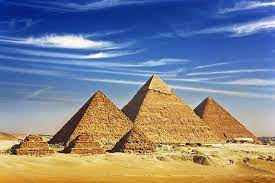

In [ ]:

temp = responses.groupby('Egypt').Q1.value_counts(normalize=True).to_frame()
temp = temp * 100
temp.columns = ['amount']

temp = temp.reset_index(drop=False)

temp = temp.pivot(index='Egypt', columns='Q1')['amount']
temp = temp.T
temp.columns = ['Row', 'Egypt']
# create data
labels = temp.index.values
y1 = temp['Row'].values
y2 = temp['Egypt'].values

width = 0.35  # the width of the bars

f, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 6))

x = np.arange(len(labels))  # the label locations

rects1 = ax.bar(x -width/2, y1, width, label='Rest of World', color=other_color)
rects2 = ax.bar(x + width/2, y2, width, label='Egypt', color=japan_color)

plt.xlabel("Age")
plt.ylabel("Percentage")
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=90)
plt.legend()
plt.title('Age Distribution among Kagglers')
plt.show()


temp = responses[(responses.Q5 != 'Student')].groupby('Egypt').Q1.value_counts(normalize=True).to_frame()
temp = temp * 100
temp.columns = ['amount']

temp = temp.reset_index(drop=False)

temp = temp.pivot(index='Egypt', columns='Q1')['amount']
temp = temp.T
temp.columns = ['Row', 'Egypt']
# create data
labels = temp.index.values
y1 = temp['Row'].values
y2 = temp['Egypt'].values

width = 0.35  # the width of the bars

f, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 6))

x = np.arange(len(labels))  # the label locations

rects1 = ax.bar(x -width/2, y1, width, label='Rest of World', color=other_color)
rects2 = ax.bar(x + width/2, y2, width, label='Egypt', color=japan_color)

plt.xlabel("Age")
plt.ylabel("Percentage")
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=90)
plt.legend()
plt.title('Age Distribution among Kagglers without Students')
plt.show()

In [ ]:
ml_cols = ['Q17_Part_1', 'Q17_Part_2', 'Q17_Part_3', 'Q17_Part_4', 'Q17_Part_5', 'Q17_Part_6', 'Q17_Part_7', 'Q17_Part_8', 'Q17_Part_9', 'Q17_Part_10', 'Q17_OTHER']

cv_cols = ['Q18_Part_1', 'Q18_Part_2', 'Q18_Part_3', 'Q18_Part_4', 'Q18_Part_5', 'Q18_OTHER']

nlp_cols = ['Q19_Part_1', 'Q19_Part_2', 'Q19_Part_3', 'Q19_Part_4', 'Q19_OTHER']

responses['ml_usage'] = responses[ml_cols].any(axis=1)
responses['cv_usage'] = responses[cv_cols].any(axis=1)
responses['nlp_usage'] = responses[nlp_cols].any(axis=1)


temp = responses[(responses.Q5 != 'Student')].groupby('Egypt')['ml_usage'].value_counts(normalize=True).to_frame()
temp.columns = ['percentage']
temp = temp.reset_index()
temp = temp.pivot(index='Egypt', columns='ml_usage')['percentage']
temp = temp.reset_index()
temp['tech'] = 'ml'

temp2 = responses[(responses.Q5 != 'Student')].groupby('Egypt')['cv_usage'].value_counts(normalize=True).to_frame()
temp2.columns = ['percentage']
temp2 = temp2.reset_index()
temp2 = temp2.pivot(index='Egypt', columns='cv_usage')['percentage']
temp2 = temp2.reset_index()
temp2['tech'] = 'cv'

temp = pd.concat([temp, temp2])

temp2 = responses[(responses.Q5 != 'Student')].groupby('Egypt')['nlp_usage'].value_counts(normalize=True).to_frame()
temp2.columns = ['percentage']
temp2 = temp2.reset_index()
temp2 = temp2.pivot(index='Egypt', columns='nlp_usage')['percentage']
temp2 = temp2.reset_index()
temp2['tech'] = 'nlp'

temp = pd.concat([temp, temp2])

temp = temp.pivot(index='tech', columns='Egypt')[True]
temp.columns = ['Rest of world', 'Egypt']

# create data
labels = ['CV', 'ML', 'NLP']
y1 = temp['Rest of world'].values
y2 = temp['Egypt'].values

width = 0.2  # the width of the bars

f, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 6))

x = np.arange(len(labels))  # the label locations

rects1 = ax.bar(x -width, y1, width, label='Rest of World', color=other_color)
rects2 = ax.bar(x, y2, width, label='Egypt', color=japan_color)

plt.xlabel("Industry")
plt.ylabel("Percentage")
ax.set_xticks(x)
ax.set_xticklabels(labels)
plt.legend()
plt.show()

In [ ]:
temp = responses[(responses.Q5 != 'Student')].groupby(['Egypt', 'Q1'])['ml_usage', 'cv_usage', 'nlp_usage'].sum().reset_index(drop=False)
temp['all'] = responses[(responses.Q5 != 'Student')].groupby(['Egypt', 'Q1'])['Q1'].count().values#to_frame()#.reset_index(drop=False)
for c in ['ml_usage', 'cv_usage', 'nlp_usage']:
    temp[c] = temp[c]/temp['all']*100

    
f, ax = plt.subplots(nrows=1, ncols=3, figsize=(24, 6))

for i, j in enumerate(['ml_usage', 'cv_usage', 'nlp_usage']):
    df = temp.pivot(index='Q1', columns='Egypt')[j].reset_index(drop=False)#[['ml_usage', 'cv_usage', 'nlp_usage']]
    df.columns = ['Age', 'Rest of World', 'Egypt']
    sns.lineplot(data=df, x='Age', y='Egypt', color=japan_color, ax=ax[i])
    sns.lineplot(data=df, x='Age', y='Rest of World', color=other_color, ax=ax[i])
    ax[i].set_title(j)
    ax[i].set_ylabel('Percentage [%]')
    ax[i].set_ylim([0,100])
    ax[0].set_title('ML Methods')
ax[0].add_patch(Ellipse((8, 75), width=5, height=25, angle=0, fill=False, alpha=1, color='k', lw=1))

ax[1].set_title('CV Methods')
ax[1].add_patch(Ellipse((8, 30), width=5, height=25, angle=0, fill=False, alpha=1, color='k', lw=1))
plt.tight_layout()
plt.show()


In [ ]:
native_speaker = ['Australia', 'Canada', 'Ireland', 'United Kingdom of Great Britain and Northern Ireland',
       'United States of America']

responses['non_native_english'] = responses.Q3.apply(lambda x: 0 if x in native_speaker else (2 if x == 'Japan' else 1))

f, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 6))
responses['Time from Start to Finish (minutes)'] = responses['Time from Start to Finish (seconds)'].astype(int)/60
ax = sns.boxplot(y='Time from Start to Finish (minutes)', x='non_native_english', data=responses, fliersize=0, palette=[other_color,other_color, japan_color])

ax.set_ylim([0,40])
ax.set_xticklabels(['Native English RoW', 'Non Native English RoW', 'Egypt'])
ax.set_xlabel('')
plt.show()


    In this place, we have seen that the countries where the majority of the population speaks English only took 10 minutes and 5 seconds. Other non-native English speaking nations took about 11 minutes.

In [ ]:
media_sources = ['Twitter', 'Newsletters', 'Reddit', 'Kaggle', 'Course Forums', 'YouTube', 'Podcasts', 'Blogs', 'Journal Publications', 'Slack Communities']
i=1
temp = responses[['Egypt', f'Q42_Part_{i}']]
temp[f'Q42_Part_{i}'] = temp[f'Q42_Part_{i}'].notna()

temp = temp.groupby('Egypt')[f'Q42_Part_{i}'].value_counts(normalize=True).to_frame()
temp.columns = [media_sources[i-1]]
temp = temp.reset_index(drop=False)
temp  = temp[temp[f'Q42_Part_{i}'] == True]
df = temp[[media_sources[i-1]]].copy()

for i in range(2,11):
    temp = responses[['Egypt', f'Q42_Part_{i}']]
    temp[f'Q42_Part_{i}'] = temp[f'Q42_Part_{i}'].notna()

    temp = temp.groupby('Egypt')[f'Q42_Part_{i}'].value_counts(normalize=True).to_frame()
    temp.columns = [media_sources[i-1]]
    temp = temp.reset_index(drop=False)
    temp  = temp[temp[f'Q42_Part_{i}'] == True]
    
    df = pd.concat([df, temp[media_sources[i-1]]], axis=1)

df = df*100

labels = df.columns.values
y1 = df.loc[1].values
y2 = df.loc[3].values

width = 0.4  

f, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 6))

x = np.arange(len(labels))

rects1 = ax.bar(x -width, y1, width, label='Rest of world', color=other_color)
rects2 = ax.bar(x, y2, width, label='Egypt', color=japan_color)

plt.xlabel("Media Source")
plt.ylabel("Percentage [%]")
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=90)
plt.legend()
plt.show()

<a id="2"></a>
# <p style="background-color:#627D78;font-family:newtimeroman;color:#D5CABD;font-size:150%;text-align:center;border-radius:20px 60px;">شكرا لكم جميعا على الوقت الذى اخزتموه للقراءه🙌😄💥 </p>